In Julia, solves a few ODEs, don't use anymore.

In [12]:
begin
    using DifferentialEquations
    using Plots
end

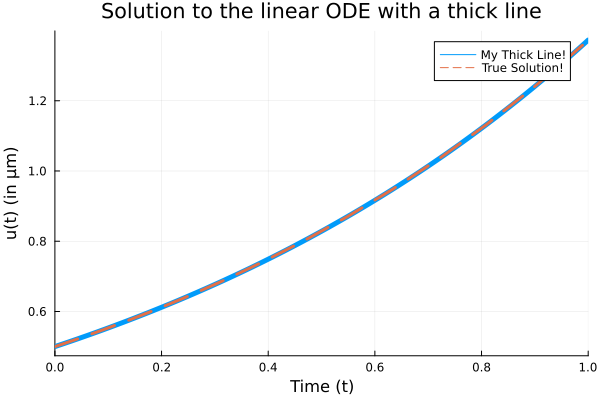

In [18]:
f(u,p,t) = 1.01 * u
u0 = 1/2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

using Plots
plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 0.5 * exp(1.01t), lw = 3, ls = :dash, label = "True Solution!")

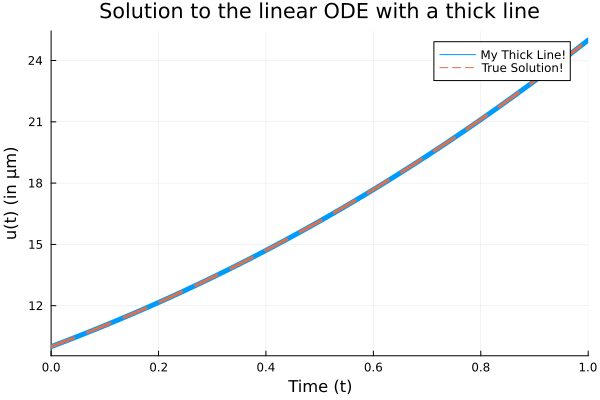

In [28]:
f(u, p, t) = (-1/100)*(log(3)-log(9)) * u * (100-u)
u0 = 10
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 100 / (exp(-100((-1/100)*(log(3)-log(9)))t+log(9))+1), lw = 3, ls = :dash, label = "True Solution!")
#print(sol)


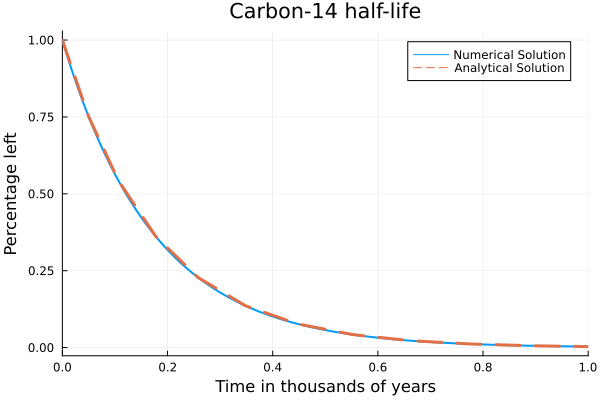

In [27]:

gr()

#Half-life of Carbon-14 is 5,730 years.
C₁ = 5.730

#Setup
u₀ = 1.0
tspan = (0.0, 1.0)

#Define the problem
radioactivedecay(u, p, t) = -C₁ * u

#Pass to solver
prob = ODEProblem(radioactivedecay, u₀, tspan)
sol = solve(prob, Tsit5())

#Plot
plot(sol, linewidth = 2, title = "Carbon-14 half-life",
     xaxis = "Time in thousands of years", yaxis = "Percentage left",
     label = "Numerical Solution")
plot!(sol.t, t -> exp(-C₁ * t), lw = 3, ls = :dash, label = "Analytical Solution")


┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


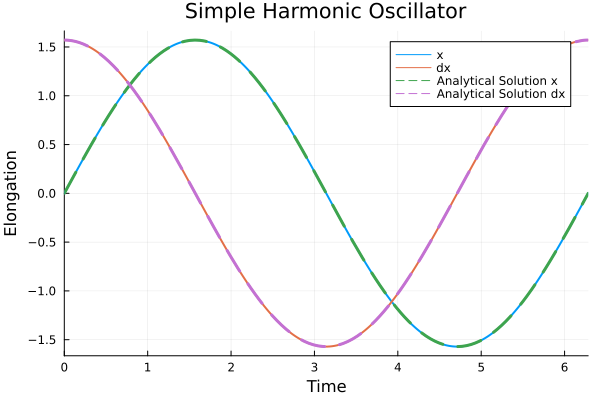

In [7]:
# Simple Harmonic Oscillator Problem


#Parameters
ω = 1

#Initial Conditions
x₀ = [0.0]
dx₀ = [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end

#Pass to solvers
prob = SecondOrderODEProblem(harmonicoscillator, dx₀, x₀, tspan, ω)
sol = solve(prob, DPRKN6())

#Plot
plot(sol, vars = [2, 1], linewidth = 2, title = "Simple Harmonic Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw = 3, ls = :dash, label = "Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw = 3, ls = :dash, label = "Analytical Solution dx")